# Multiclass Perceptron

## Load data

In [254]:
train.data <- read.csv(file = "data/train.csv")[1:4]
train.label <- read.csv(file = "data/train.csv")[5]
test.data <- read.csv(file = "data/test.csv")[1:4]
test.label <- read.csv(file = "data/test.csv")[5]
train.len  <- nrow(train.data)
test.len  <- nrow(test.data)

## Implementation of Perceptron

In [1]:
# Create the function of a 3 classes perceptron
perceptron_3 <- function(train.data, train.label, test.data, test.label, eta=0.1, epsilon=0.01, tau.max=75){   
    ## Basis function (Step 1) for train dataset
    Phi <- as.matrix(cbind(1, train.data)) # add a column of 1 as phi_0
    
    # Initialization
    W1 <- matrix(,nrow=tau.max, ncol=ncol(Phi)) # Empty Weight vector
    W2 <- matrix(,nrow=tau.max, ncol=ncol(Phi)) # Empty Weight vector
    W3 <- matrix(,nrow=tau.max, ncol=ncol(Phi)) # Empty Weight vector
    W1[1,] <- runif(ncol(Phi)) # Random initial values for weight vector for C1
    W2[1,] <- runif(ncol(Phi)) # Random initial values for weight vector for C2
    W3[1,] <- runif(ncol(Phi)) # Random initial values for weight vector for C3

    tau.C1 <- 1 # iteration counter for C1
    tau.C2 <- 1 # iteration counter for C2
    tau.C3 <- 1 # iteration counter for C3
    tau <- 1
    terminate <- FALSE # termination status
    
    # Creation of dataframe to store W*Phi of each class
    category <- c("C1", "C2", "C3")
    y <- c(1, 1, 1)
    categories <- cbind(data.frame(category), data.frame(y))
    
    # Creation of dataframe to store the error of each batch
    error.test <- data.frame('rows'=seq(5, test.len, 5), 'error'=seq(5, test.len, 5))
    tau.error <- 1

    while(!terminate){
        # resuffling train data and associated labels:
        train.index <- sample(1:train.len, replace = FALSE)
        Phi <- Phi[train.index,]
        T <- train.label[train.index,]

        for (i in 1:train.len){
            categories[1, 2] = W1[tau.C1,] %*% Phi[i,] # Calculate W*Phi for Class 1
            categories[2, 2] = W2[tau.C2,] %*% Phi[i,] # Calculate W*Phi for Class 2
            categories[3, 2] = W3[tau.C3,] %*% Phi[i,] # Calculate W*Phi for Class 3

            cat = categories$category[which.max(categories$y)]  # Get the category with the higher prediction
            tau <- tau + 1 # Iterations of the model

            if (tau == tau.max) {break}

            # look for missclassified samples
            if ( cat != T[i]){

                # Verify incorrect prediction and update weights decreasing the value
                if (cat == 'C1'){
                    # update tau counter for C1
                    tau.C1 <- tau.C1 +1
                    # update the prediction weights 
                    W1[tau.C1,] <- W1[tau.C1-1,] - eta * Phi[i,]
                }
                if (cat == 'C2'){
                    # update tau counter for C2
                    tau.C2 <- tau.C2 +1
                    # update the prediction weights 
                    W2[tau.C2,] <- W2[tau.C2-1,] - eta * Phi[i,]
                }
                if (cat == 'C3'){
                    # update tau counter for C3
                    tau.C3 <- tau.C3 +1
                    # update the prediction weights 
                    W3[tau.C3,] <- W3[tau.C3-1,] - eta * Phi[i,]
                }

                # Verify true label and update weights decreasing the value
                if (T[i] == 'C1'){
                    # update tau counter for C1
                    tau.C1 <- tau.C1 + 1
                    # update the prediction weights 
                    W1[tau.C1,] <- W1[tau.C1-1,] + eta * Phi[i,]
                }
                if (T[i] == 'C2'){
                    # update tau counter for C2
                    tau.C2 <- tau.C2 + 1
                    # update the prediction weights 
                    W2[tau.C2,] <- W2[tau.C2-1,] + eta * Phi[i,]
                }
                if (T[i] == 'C3'){
                    # update tau counter for C3
                    tau.C3 <- tau.C3 + 1
                    # update the prediction weights 
                    W3[tau.C3,] <- W3[tau.C3-1,] + eta * Phi[i,]
                }

            if(i %% 5 == 0){
                ## Basis function (Step 1) foe test dataset
                Phi.test <- as.matrix(cbind(1, test.data)) # add a column of 1 as phi_0

                # count the error occurs
                error = 0
                
                # For every row in the test dataset
                for (j in 1:test.len){
                    categories[1, 2] = W1[tau.C1,] %*% Phi.test[j,] # Calculate W*Phi for Class 1
                    categories[2, 2] = W2[tau.C2,] %*% Phi.test[j,] # Calculate W*Phi for Class 2
                    categories[3, 2] = W3[tau.C3,] %*% Phi.test[j,] # Calculate W*Phi for Class 3

                    cat = categories$category[which.max(categories$y)] # Get the category with the higher prediction

                    if (cat != test.label[j,]){ # If the prediction is not correct
                        error  <- error + 1 # Count the misclasification error
                    }
                }

                error.test[error.test$rows == i, 2] <- error/test.len*100 # Calculate the missclasification rate
                tau.error <- tau.error + 1 # Iteration counter
            }
            # update the records
            } 
        terminate <- tau >= tau.max # Terminate condition
        }
    }
    return(error.test) # Return the error 
}

Here we train two multiclass perceptron models on the provided training data by setting the learning rates η to .1 and .01 respectively. Note that all parameter settings stay the same, except the learning rate, when building each model.

For each model, we evaluated the error of the model on the test data, after processing every 5 training data points (also known as a mini-batch). Then, we plotted the testing errors of two models built based on the learning rates 0.09 and 0.01 (with different colors) versus the number of mini-batches. 

In [369]:
set.seed(1234)
eta_0.01 <- perceptron_3(train.data, train.label, test.data, test.label, 0.01, 0.01, 75)
names(eta_0.01)  <- c('batchs', 'eta_0.01')

In [373]:
set.seed(1234)
eta_0.1 <- perceptron_3(train.data, train.label, test.data, test.label, 0.1, 0.01, 75)
names(eta_0.1)  <- c('batchs', 'eta_0.1')

In [374]:
## merging and melting for visualizations
library(reshape)
error <- merge(eta_0.01, eta_0.1, by='batchs')
error.m <- melt(error, id=c('batchs'))
names(error.m)  <- c('batchs', 'eta', 'value')

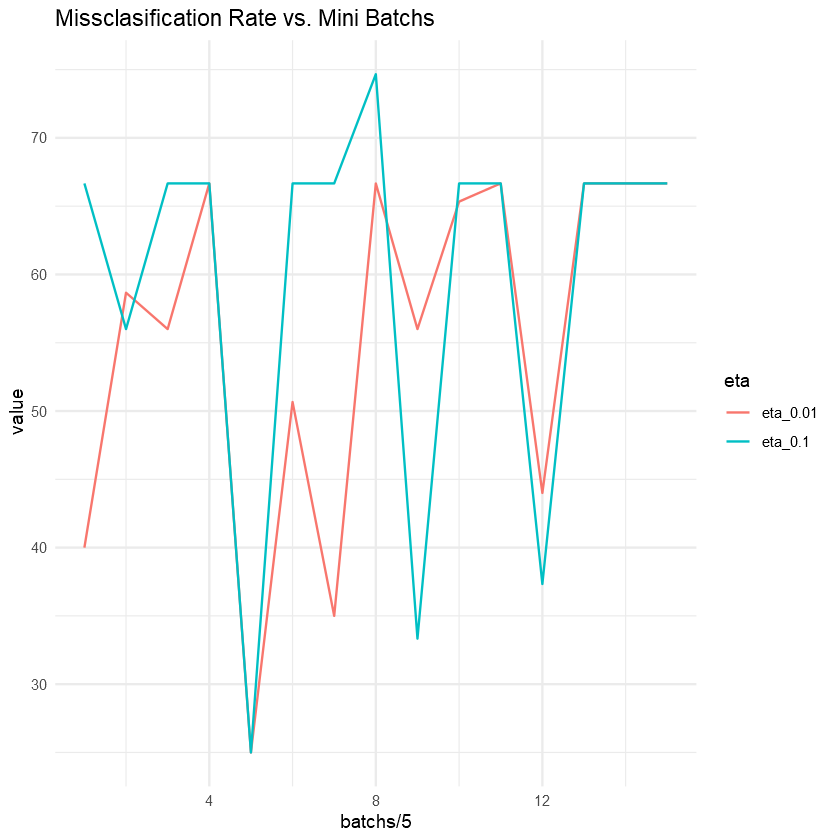

In [375]:
## Training error
library(ggplot2)
ggplot(data=error.m,aes(x=batchs/5, y=value, color=eta)) + geom_line()  +
    ggtitle('Missclasification Rate vs. Mini Batchs') + theme_minimal()

From the plot we can observe that prediction of the class does not depend on the value of the number of rows of the training dataset, nor the value of eta. The main reason of why this could have happened, is that the dataset is not that large enough (only 75 rows) so we can see how the model gets stable. A small sample of classfications lead use to a pretty unstable model that not even a small $\eta$ can improve the optimization. May be if we get a bigger dataset the accuracy of prediction could increase with the number of batches.
